In [1]:
import pandas as pd

In [2]:
import pickle

In [3]:
!git clone https://github.com/wshuyi/demo_traffic_jam_prediction.git

fatal: destination path 'demo_traffic_jam_prediction' already exists and is not an empty directory.


In [4]:
from pathlib import Path
data_dir = Path('demo_traffic_jam_prediction')

In [5]:
with open(data_dir / 'data.pickle', 'rb') as f:
    [event_dict, df] = pickle.load(f)

In [6]:
event_dict

{1: 'road closed due to construction',
 2: 'traffic jam',
 3: 'stopped car on the shoulder',
 4: 'road closed',
 5: 'other',
 6: 'object on roadway',
 7: 'major event',
 8: 'pothole',
 9: 'traffic heavier than normal',
 10: 'road construction',
 11: 'fog',
 12: 'accident',
 13: 'slowdown',
 14: 'stopped car',
 15: 'small traffic jam',
 16: 'stopped traffic',
 17: 'heavy traffic',
 18: 'minor accident',
 19: 'medium traffic jam',
 20: 'malfunctioning traffic light',
 21: 'missing sign on the shoulder',
 22: 'animal on the shoulder',
 23: 'animal struck',
 24: 'large traffic jam',
 25: 'hazard on the shoulder',
 26: 'hazard on road',
 27: 'ice on roadway',
 28: 'weather hazard',
 29: 'flooding',
 30: 'road closed due to hazard',
 31: 'hail',
 32: 'huge traffic jam'}

In [7]:
df.head(10)

,label,events
0,1,"[traffic heavier than normal, heavy traffic, m..."
1,1,"[traffic jam, road construction, stopped car o..."
2,1,[traffic jam]
3,1,[traffic jam]
4,1,"[traffic jam, traffic jam, traffic jam, traffi..."
5,1,"[stopped car on the shoulder, traffic jam, hea..."
6,1,"[stopped car on the shoulder, traffic jam, hea..."
7,1,"[traffic jam, small traffic jam, traffic jam, ..."
8,1,"[heavy traffic, traffic jam, traffic jam, stop..."
9,1,"[heavy traffic, traffic jam, traffic jam, stop..."


In [8]:
df.tail(10)

,label,events
851,0,"[traffic jam, traffic jam, traffic jam]"
852,0,"[stopped traffic, traffic jam, stopped traffic]"
853,0,"[stopped car on the shoulder, stopped traffic,..."
854,0,[stopped traffic]
855,0,"[stopped car on the shoulder, stopped car on t..."
856,0,"[heavy traffic, heavy traffic, heavy traffic, ..."
857,0,"[traffic jam, traffic jam]"
858,0,"[traffic jam, traffic jam, traffic heavier tha..."
859,0,"[heavy traffic, stopped car on the shoulder, t..."
860,0,"[heavy traffic, stopped car on the shoulder, s..."


In [9]:
max_len_event_id = df.events.apply(len).idxmax()
max_len_event_id

105

In [10]:
max_len_event = df.iloc[max_len_event_id]
max_len_event.events

['stopped car on the shoulder',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'slowdown',
 'stopped traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'stopped car on the shoulder',
 'traffic jam',
 'heavy traffic',
 'stopped traffic',
 'stopped traffic',
 'stopped traffic',
 'heavy traffic',
 'traffic jam',
 'stopped car on the shoulder',
 'stopped traffic',
 'stopped traffic',
 'stopped traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'traffic heavier than normal',
 'heavy traffic',
 'stopped traffic',
 'traffic heavier than normal',
 'pothole',
 'stopped car on the shoulder',
 'traffic jam',
 'slowdown',
 'stopped traffic',
 'heavy traffic',
 'traffic heavier than normal',
 'traffic jam',
 'traffic jam',
 'stopped car on the shoulder',
 'major event',
 'traffic jam',
 'traffic jam',
 'stopped traffic',
 'heavy traffic',
 'traffic heavie

In [11]:
maxlen = len(max_len_event.events)
maxlen

84

In [12]:
reversed_dict = {}
for k, v in event_dict.items():
  reversed_dict[v] = k

In [13]:
reversed_dict

{'road closed due to construction': 1,
 'traffic jam': 2,
 'stopped car on the shoulder': 3,
 'road closed': 4,
 'other': 5,
 'object on roadway': 6,
 'major event': 7,
 'pothole': 8,
 'traffic heavier than normal': 9,
 'road construction': 10,
 'fog': 11,
 'accident': 12,
 'slowdown': 13,
 'stopped car': 14,
 'small traffic jam': 15,
 'stopped traffic': 16,
 'heavy traffic': 17,
 'minor accident': 18,
 'medium traffic jam': 19,
 'malfunctioning traffic light': 20,
 'missing sign on the shoulder': 21,
 'animal on the shoulder': 22,
 'animal struck': 23,
 'large traffic jam': 24,
 'hazard on the shoulder': 25,
 'hazard on road': 26,
 'ice on roadway': 27,
 'weather hazard': 28,
 'flooding': 29,
 'road closed due to hazard': 30,
 'hail': 31,
 'huge traffic jam': 32}

In [14]:
def map_event_list_to_idxs(event_list):
  list_idxs = []
  for event in (event_list):
    idx = reversed_dict[event]
    list_idxs.append(idx)
  return list_idxs

In [15]:
map_event_list_to_idxs(max_len_event.events)

[3,
 17,
 17,
 17,
 13,
 16,
 17,
 17,
 17,
 17,
 9,
 3,
 2,
 17,
 16,
 16,
 16,
 17,
 2,
 3,
 16,
 16,
 16,
 17,
 9,
 9,
 9,
 9,
 17,
 16,
 9,
 8,
 3,
 2,
 13,
 16,
 17,
 9,
 2,
 2,
 3,
 7,
 2,
 2,
 16,
 17,
 9,
 3,
 13,
 17,
 17,
 3,
 2,
 13,
 13,
 17,
 3,
 17,
 18,
 3,
 17,
 3,
 17,
 16,
 17,
 9,
 17,
 3,
 9,
 16,
 17,
 17,
 17,
 3,
 13,
 16,
 17,
 3,
 9,
 17,
 18,
 7,
 3,
 3]

In [16]:
!pip install tensorflow==2.7

In [17]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
len(event_dict)

32

In [20]:
df.events.apply(map_event_list_to_idxs)

0      [9, 17, 18, 14, 13, 17, 3, 13, 16, 3, 17, 17, ...
1                                             [2, 10, 3]
2                                                    [2]
3                                                    [2]
4                               [2, 2, 2, 2, 2, 2, 2, 9]
                             ...                        
856                    [17, 17, 17, 2, 3, 2, 2, 2, 2, 2]
857                                               [2, 2]
858                                  [2, 2, 9, 17, 2, 2]
859                            [17, 3, 2, 2, 2, 2, 2, 2]
860    [17, 3, 3, 17, 3, 17, 2, 3, 18, 14, 3, 3, 16, ...
Name: events, Length: 1722, dtype: object

In [21]:
sequences = df.events.apply(map_event_list_to_idxs).tolist()
sequences[:5]

[[9,
  17,
  18,
  14,
  13,
  17,
  3,
  13,
  16,
  3,
  17,
  17,
  16,
  3,
  16,
  17,
  9,
  17,
  2,
  17,
  2,
  7,
  16,
  17,
  17,
  17,
  17,
  13,
  5,
  17,
  9,
  9,
  16,
  16,
  3],
 [2, 10, 3],
 [2],
 [2],
 [2, 2, 2, 2, 2, 2, 2, 9]]

In [22]:
len(sequences)

1722

In [23]:
data = pad_sequences(sequences, maxlen=maxlen)
data

array([[ 0,  0,  0, ..., 16, 16,  3],
       [ 0,  0,  0, ...,  2, 10,  3],
       [ 0,  0,  0, ...,  0,  0,  2],
       ...,
       [ 0,  0,  0, ..., 17,  2,  2],
       [ 0,  0,  0, ...,  2,  2,  2],
       [ 0,  0,  0, ...,  3,  3,  2]])

In [24]:
labels = np.array(df.label)

In [25]:
np.random.seed(12)

In [26]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [27]:
training_samples = int(len(indices) * .8)
validation_samples = len(indices) - training_samples

In [28]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_valid = data[training_samples: training_samples + validation_samples]
y_valid = labels[training_samples: training_samples + validation_samples]

In [29]:
X_train

array([[ 0,  0,  0, ..., 15, 15,  3],
       [ 0,  0,  0, ...,  0,  2,  2],
       [ 0,  0,  0, ...,  0,  0, 16],
       ...,
       [ 0,  0,  0, ...,  2, 15, 16],
       [ 0,  0,  0, ...,  2,  2,  2],
       [ 0,  0,  0, ...,  0,  0,  2]])

In [30]:
num_events = len(event_dict) + 1

In [31]:
embedding_dim = 20

In [32]:
embedding_matrix = np.random.rand(num_events, embedding_dim)

In [33]:
#Embedded Layer
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [35]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("mymodel_embedding_untrainable.h5")

Epoch 1/50
44/44 [==============================] - 3s 30ms/step - loss: 0.6710 - acc: 0.5933 - val_loss: 0.6728 - val_acc: 0.6029
Epoch 2/50
44/44 [==============================] - 1s 23ms/step - loss: 0.6414 - acc: 0.6442 - val_loss: 0.6621 - val_acc: 0.5826
Epoch 3/50
44/44 [==============================] - 1s 23ms/step - loss: 0.6194 - acc: 0.6710 - val_loss: 0.7224 - val_acc: 0.5565
Epoch 4/50
44/44 [==============================] - 1s 24ms/step - loss: 0.6120 - acc: 0.6688 - val_loss: 0.6182 - val_acc: 0.6464
Epoch 5/50
44/44 [==============================] - 1s 23ms/step - loss: 0.5925 - acc: 0.7015 - val_loss: 0.6019 - val_acc: 0.6638
Epoch 6/50
44/44 [==============================] - 1s 23ms/step - loss: 0.5883 - acc: 0.6870 - val_loss: 0.6588 - val_acc: 0.5942
Epoch 7/50
44/44 [==============================] - 1s 25ms/step - loss: 0.5799 - acc: 0.6986 - val_loss: 0.5810 - val_acc: 0.6725
Epoch 8/50
44/44 [==============================] - 1s 23ms/step - loss: 0.5695 - a

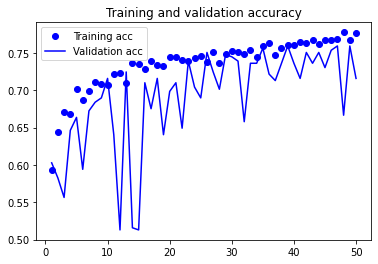

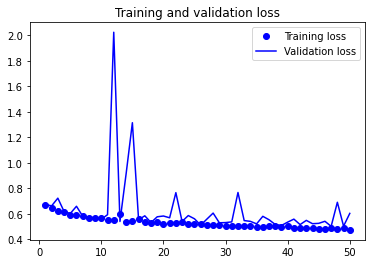

In [36]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [37]:
#LSTM Layer
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [39]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("mymodel_embedding_trainable.h5")

Epoch 1/50
44/44 [==============================] - 3s 32ms/step - loss: 0.6810 - acc: 0.5592 - val_loss: 0.7054 - val_acc: 0.5362
Epoch 2/50
44/44 [==============================] - 1s 24ms/step - loss: 0.6491 - acc: 0.6158 - val_loss: 0.6738 - val_acc: 0.5217
Epoch 3/50
44/44 [==============================] - 1s 23ms/step - loss: 0.6181 - acc: 0.6688 - val_loss: 0.6496 - val_acc: 0.6029
Epoch 4/50
44/44 [==============================] - 1s 23ms/step - loss: 0.5927 - acc: 0.6892 - val_loss: 0.6422 - val_acc: 0.5507
Epoch 5/50
44/44 [==============================] - 1s 24ms/step - loss: 0.5759 - acc: 0.7059 - val_loss: 0.7272 - val_acc: 0.5275
Epoch 6/50
44/44 [==============================] - 1s 20ms/step - loss: 0.5640 - acc: 0.7146 - val_loss: 0.6897 - val_acc: 0.6261
Epoch 7/50
44/44 [==============================] - 1s 20ms/step - loss: 0.5481 - acc: 0.7262 - val_loss: 0.5511 - val_acc: 0.7130
Epoch 8/50
44/44 [==============================] - 1s 20ms/step - loss: 0.5342 - a

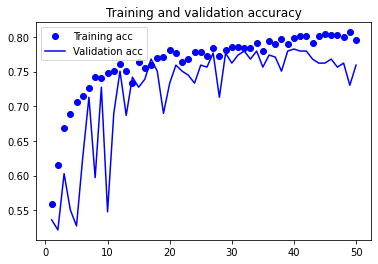

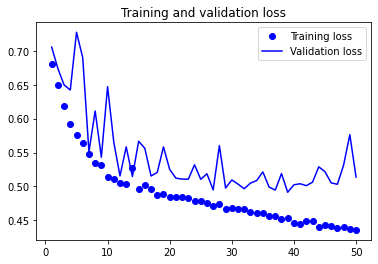

In [40]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
#Dense Layer
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

In [43]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
model.save("mymodel_embedding_trainable_with_dropout.h5")

Epoch 1/50
44/44 [==============================] - 4s 41ms/step - loss: 0.6652 - acc: 0.6013 - val_loss: 0.6610 - val_acc: 0.6203
Epoch 2/50
44/44 [==============================] - 2s 37ms/step - loss: 0.6344 - acc: 0.6391 - val_loss: 0.6474 - val_acc: 0.5884
Epoch 3/50
44/44 [==============================] - 2s 34ms/step - loss: 0.6110 - acc: 0.6761 - val_loss: 0.6894 - val_acc: 0.5797
Epoch 4/50
44/44 [==============================] - 2s 34ms/step - loss: 0.5981 - acc: 0.6790 - val_loss: 0.6617 - val_acc: 0.5304
Epoch 5/50
44/44 [==============================] - 2s 35ms/step - loss: 0.5885 - acc: 0.6812 - val_loss: 0.5900 - val_acc: 0.6754
Epoch 6/50
44/44 [==============================] - 2s 35ms/step - loss: 0.5697 - acc: 0.7081 - val_loss: 0.7259 - val_acc: 0.5217
Epoch 7/50
44/44 [==============================] - 2s 35ms/step - loss: 0.5665 - acc: 0.7030 - val_loss: 0.5717 - val_acc: 0.6928
Epoch 8/50
44/44 [==============================] - 2s 36ms/step - loss: 0.5572 - a

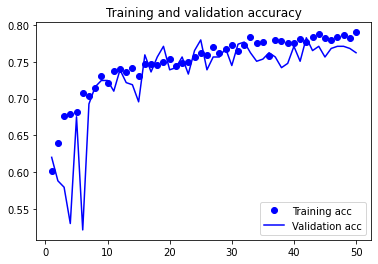

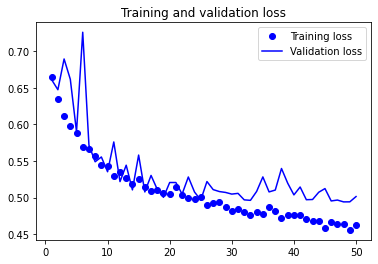

In [44]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()